In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', 500)

In [2]:
data2018 = pd.read_csv('Statistiques médicaments 2018 Colombey.csv', sep=';')
data2019 = pd.read_csv('Statistiques médicaments 2019 Colombey.csv', sep=';')
data2020 = pd.read_csv('Statistiques médicaments 2020 Colombey.csv', sep=';')
data2021 = pd.read_csv('Statistiques médicaments 2021 Colombey.csv', sep=';')

In [3]:
data2018 = data2018.fillna('')
data2019 = data2019.fillna('')
data2020 = data2020.fillna('')
data2021 = data2021.fillna('')

In [4]:
def treat_df(data2019):
    col1 = data2019.columns.to_list()[0]
    for i in range(len(data2019)):
        if data2019[col1][i] in ['C.A.', 'Quantité', 'Marge', '']:
            data2019.drop(i, inplace=True)
    data2019 = data2019[data2019['Unnamed: 8'] != '']
    data2019 = data2019.rename(columns={'Unnamed: 9': 'Revenue', 'Unnamed: 13': 'Quantity', 'Unnamed: 19': 'Profit'})
    c = data2019.columns.to_list()
    cols = [x for x in c if 'Unnamed' in x]
    data2019 = data2019.drop(columns=cols, axis=1)
    data2019['Revenue'] = pd.to_numeric(data2019['Revenue'], errors='coerce')
    data2019['Revenue'] = data2019['Revenue'].fillna(0)
    data2019['Quantity'] = pd.to_numeric(data2019['Quantity'], errors='coerce')
    data2019['Quantity'] = data2019['Quantity'].fillna(0)
    data2019['Profit'] = pd.to_numeric(data2019['Profit'], errors='coerce')
    data2019['Profit'] = data2019['Profit'].fillna(0)
    data2019['Price'] = data2019['Revenue']/data2019['Quantity']
    data2019['Unit Cost'] = (data2019['Revenue'] - data2019['Profit'])/data2019['Quantity']
    data2019['Profit margin'] = data2019['Profit']/data2019['Revenue']
    
    return data2019

In [5]:
df2018 = treat_df(data2018)
df2019 = treat_df(data2019)
df2020 = treat_df(data2020)
df2021 = treat_df(data2021)

### Pricing analysis for medicines that have the highest revenues

In [6]:
x = 'Revenue' # or 'Profit'
order = False # or True

sorted2018 = df2018.sort_values(by=[x], ascending=order).iloc[0:-1]
sorted2019 = df2019.sort_values(by=[x], ascending=order).iloc[0:-1]
sorted2020 = df2020.sort_values(by=[x], ascending=order).iloc[0:-1]
sorted2021 = df2021.sort_values(by=[x], ascending=order).iloc[0:-1]

sorted2018.index = sorted2018.iloc[:,0].to_list()
sorted2019.index = sorted2019.iloc[:,0].to_list()
sorted2020.index = sorted2020.iloc[:,0].to_list()
sorted2021.index = sorted2021.iloc[:,0].to_list()


### ABC Classification

In [7]:
sorted2018abc = sorted2018
sorted2019abc = sorted2019
sorted2020abc = sorted2020
sorted2021abc = sorted2021

sorted2018abc['Cumulative revenue'] = np.nan
sorted2019abc['Cumulative revenue'] = np.nan
sorted2020abc['Cumulative revenue'] = np.nan
sorted2021abc['Cumulative revenue'] = np.nan

l_df_ = [sorted2018abc, sorted2019abc, sorted2020abc, sorted2021abc]


j = 0

for i in l_df_:
    i.iloc[:,0] = [k for k in range(len(i))]
    if 'MEDICAMENTS' in list(i.index):
        i.drop(index='MEDICAMENTS', inplace = True)
    j = 0
    for j in range(len(i)):
        if j == 0:
            i['Cumulative revenue'].iloc[j] = float(i['Revenue'].iloc[j]/i['Revenue'].sum())
        if j > 0:
            i['Cumulative revenue'].iloc[j] = float(i['Revenue'].iloc[j]/i['Revenue'].sum()) + float(i['Cumulative revenue'].iloc[j-1])
        

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


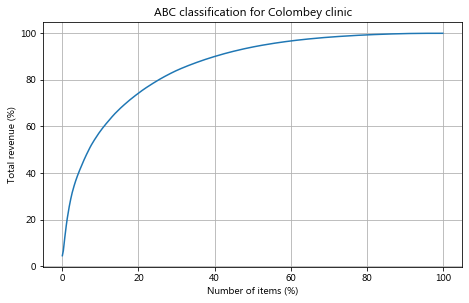

In [8]:
item_nbr = list(sorted2021abc.iloc[:,0]/sorted2021abc.iloc[-1,0]*100)
cum_rev = list(sorted2021abc.iloc[:,7]*100)
font = 'Microsoft New Tai Lue'
plt.rcParams["figure.figsize"] = (7.5,4.5)

plt.plot(item_nbr, cum_rev)
plt.xlabel('Number of items (%)', fontname = font)
plt.ylabel('Total revenue (%)', fontname = font)
plt.xticks(fontname = font)
plt.title('ABC classification for Colombey clinic', fontname=font)
plt.yticks(fontname = font)
plt.grid(visible=True)
plt.savefig('ABC classification for Colombey clinic.png')
# plt.vlines(0.12, 0.05, 0.7, colors='k', linestyles='dashed')
# plt.hlines(0.7, 0, 0.12, colors='k', linestyles='dashed')
# plt.vlines(0.3, 0.05, 0.9, colors='r', linestyles='dashed')
# plt.hlines(0.9, 0, 0.3, colors='r', linestyles='dashed')
# plt.vlines(1, 0.05, 1, colors='b', linestyles='dashed')
# plt.hlines(1, 0, 1, colors='b', linestyles='dashed')
# plt.annotate('A', (0.12,0.3), textcoords="offset pixels", xytext=(-10,12), ha='center', color = 'k') 
# plt.annotate('B', (0.3,0.5), textcoords="offset pixels", xytext=(-10,12), ha='center', color = 'r') 
# plt.annotate('C', (1,0.7), textcoords="offset pixels", xytext=(-10,12), ha='center', color = 'b') 
plt.show()

In [9]:
# Update purchase price
sorted2018 = df2018.sort_values(by=[x], ascending=order)
sorted2019 = df2019.sort_values(by=[x], ascending=order)
sorted2020 = df2020.sort_values(by=[x], ascending=order)
sorted2021 = df2021.sort_values(by=[x], ascending=order)

l_df = [sorted2018, sorted2019, sorted2020, sorted2021]

for i in l_df:
    for j in range(len(i)):
        if 'BRAVECTO P' in i.iloc[j,0]:
            i.iloc[j,5] = 0.68*i.iloc[j,5]
            
for i in l_df:
    for j in range(len(i)):
        if 'CREDELIO' in i.iloc[j,0] and 'CHAT' in i.iloc[j,0]:
            i.iloc[j,5] = 0.68*i.iloc[j,5]
            
for i in l_df:
    for j in range(len(i)):
        if 'NEXGARD' in i.iloc[j,0]:
            i.iloc[j,5] = 0.53*i.iloc[j,5]
    
for i in l_df:
    for j in range(len(i)):
        if 'CESTEM' in i.iloc[j,0]:
            i.iloc[j,5] = 0.48*i.iloc[j,5]
            
for i in l_df:
    for j in range(len(i)):
        if 'ONSIOR' in i.iloc[j,0]:
            i.iloc[j,5] = 0.55*i.iloc[j,5]
            
for i in l_df:
    for j in range(len(i)):
        if 'ONSIOR' in i.iloc[j,0]:
            i.iloc[j,5] = 0.46*i.iloc[j,5]
            
for i in l_df:
    for j in range(len(i)):
        if 'DERMIPRED' in i.iloc[j,0]:
            i.iloc[j,5] = 0.57*i.iloc[j,5]


In [10]:
sorted2021.head()

,Statistiques médicaments 2021,Revenue,Quantity,Profit,Price,Unit Cost,Profit margin
345,BRAVECTO POUR CHIEN DE 20KG A 40KG,10446.20,166.50,4244.31,62.739940,25.329040,0.406302
1842,MEDICAMENTS,6566.11,305.10,6566.11,21.521173,0.000000,1.000000
2042,MILBEMAX GD CHIEN A CROQUER,4974.14,647.00,2250.88,7.688006,4.209057,0.452516
862,CREDELIO 48MG COMPRIMES A CROQUER CHAT BOITE D...,4759.60,496.00,2206.44,9.595968,3.500300,0.463577
339,BRAVECTO POUR CHIEN DE 10KG A 20KG,4303.99,75.00,1790.54,57.386533,22.788613,0.416019
2171,NEXGARD COMBO SPOT-ON CHAT 2.5- 7.5 KG,4234.40,397.00,1874.37,10.665995,3.150670,0.442653
2030,MILBEMAX CT,4208.07,556.00,1922.24,7.568471,4.111205,0.456798
3529,SHOTAPEN,3979.07,1069.71,3777.18,3.719765,0.188733,0.949262
186,APOQUEL 16MG,3819.22,157.00,1728.02,24.326242,13.319745,0.452454
712,CESTEM F XL GRAND CHIEN BOITE DE 48 COMPRIMES,3722.10,343.00,1693.18,10.851603,2.839305,0.454899


In [11]:
topmeds = []

topmeds.append(sorted2021.iloc[0,0])
topmeds.append(sorted2021.iloc[1,0])
topmeds.append(sorted2021.iloc[2,0])

lst2021 = sorted2021.iloc[:,0].to_list()
lst2020 = sorted2020.iloc[:,0].to_list()
lst2019 = sorted2019.iloc[:,0].to_list()
lst2018 = sorted2018.iloc[:,0].to_list()

# possible to extend list of medicines to analyze by increasing lists here

i = 0

while len(topmeds) <= 90:
    if lst2020[i] not in topmeds:
        if lst2020[i] in list(set(lst2021) & set(lst2019) & set(lst2018)):
            topmeds.append(df2020.sort_values(by=['Revenue'], ascending=False).iloc[i, 0])
    i = i+1

i = 0   
    
while len(topmeds) <= 131:
    if lst2019[i] not in topmeds:
        if lst2019[i] in list(set(lst2021) & set(lst2020) & set(lst2020)):
            topmeds.append(df2019.sort_values(by=['Revenue'], ascending=False).iloc[i, 0])
    i = i+1

topmeds.remove('MEDICAMENTS')

print(topmeds)

Data = pd.DataFrame(index = topmeds, columns=['P_2018', 'Q_2018', 'P_2019', 'Q_2019', 'P_2020', 'Q_2020', 'P_2021', 'Q_2021', 'Cost_2019', 
                                             'Cost_2020', 'Cost_2021'])  


['BRAVECTO POUR CHIEN DE 20KG A 40KG', 'MILBEMAX GD CHIEN A CROQUER', 'APOQUEL 16MG', 'BRAVECTO POUR CHIEN DE 10KG A 20KG', 'MILBEMAX CT', 'BENEFORTIN 5MG', 'APOQUEL 5.4MG', 'BRAVECTO POUR CHIEN DE 4.5KG A 10KG', 'BRAVECTO SPOT ON CHAT DE 2.8 A 6.25KG', 'SHOTAPEN', 'PREVOMAX 10MG/ML', 'SERAQUIN CHIEN', 'DERMIPRED 20', 'SERESTO COLLIER GRAND CHIEN', 'RC CN SATIETY SUPPORT', 'VETMEDIN S 5MG', 'EASOTIC', 'CONVENIA .CEFOVECINE. ANTIBIOTHERAPIE DE 14 JOURS', 'APOQUEL 3.6MG', 'ONSIOR CHIEN 20 MG', 'RC CN NEUTD ADULT SMALL DOG', 'BRAVECTO POUR CHIEN DE 40KG A 56KG', 'SEMINTRA 4MG/ML SOLUTION ORALE POUR CHAT', 'NEXGARD SPECTRAL L CHIENS DE 15 A 30KG', 'METROBACTIN 500MG BOITE DE 250 COMPRIMES', 'CANDILAT', 'NEXGARD SPECTRA M CHIENS DE 7.5 A 15KG', 'PROFENDER CHAT MOYEN', 'PROPLAN DOG ADULT LARGE ATHLETIC CHICKEN 14KG', 'BENEFORTIN 2.5MG', 'SERESTO COLLIER CHAT', 'RC CT SATIETY SUPPORT', 'RESPIPHYTOL', 'PROFENDER CHAT GRAND', 'FRADEXAM POMMADE 5G', 'BRAVECTO POUR CHIEN DE 2KG A 4.5KG', 'DERMIPR

In [12]:
for i in topmeds:
    
    Data.at[i,'P_2018'] = sorted2018.loc[sorted2018.iloc[:,0] == i]['Price'].sum()
    Data.at[i,'Q_2018'] = sorted2018.loc[sorted2018.iloc[:,0] == i]['Quantity'].sum()
    Data.at[i,'P_2019'] = sorted2019.loc[sorted2019.iloc[:,0] == i]['Price'].sum()
    Data.at[i,'Q_2019'] = sorted2019.loc[sorted2019.iloc[:,0] == i]['Quantity'].sum()
    Data.at[i,'P_2020'] = sorted2020.loc[sorted2020.iloc[:,0] == i]['Price'].sum()
    Data.at[i,'Q_2020'] = sorted2020.loc[sorted2020.iloc[:,0] == i]['Quantity'].sum()
    Data.at[i,'P_2021'] = sorted2021.loc[sorted2021.iloc[:,0] == i]['Price'].sum()
    Data.at[i,'Q_2021'] = sorted2021.loc[sorted2021.iloc[:,0] == i]['Quantity'].sum()
    Data.at[i,'Cost_2019'] = sorted2019.loc[sorted2019.iloc[:,0] == i]['Unit Cost'].sum()
    Data.at[i,'Cost_2020'] = sorted2020.loc[sorted2020.iloc[:,0] == i]['Unit Cost'].sum()
    Data.at[i,'Cost_2021'] = sorted2021.loc[sorted2021.iloc[:,0] == i]['Unit Cost'].sum()
        
    # update purchase prices

for i in range(len(Data)):
    for j in range(len(Data.iloc[0,:])):
        Data.iloc[i,j] = float(Data.iloc[i,j])
        
Data

,P_2018,Q_2018,P_2019,Q_2019,P_2020,Q_2020,P_2021,Q_2021,Cost_2019,Cost_2020,Cost_2021
BRAVECTO POUR CHIEN DE 20KG A 40KG,48.892149,188.5,60.908949,141.02,64.692295,122.0,62.73994,166.5,26.13935,26.501328,25.32904
MILBEMAX GD CHIEN A CROQUER,5.984841,473.0,6.606121,348.0,7.568633,395.0,7.688006,647.0,3.887845,4.064076,4.209057
APOQUEL 16MG,27.061031,166.8,24.725058,173.2,24.664967,227.5,24.326242,157.0,13.656005,13.265846,13.319745
BRAVECTO POUR CHIEN DE 10KG A 20KG,45.677143,91.0,51.512229,78.5,57.363484,77.5,57.386533,75.0,23.239455,23.913977,22.788613
MILBEMAX CT,6.059455,550.5,6.807825,285.0,7.242912,498.0,7.568471,556.0,3.783228,3.967249,4.111205
...,...,...,...,...,...,...,...,...,...,...,...
STRONGHOLD 15MG (CHIOTS-CHATONS),0.0,0.0,6.833542,48.0,8.556591,132.0,8.616058,137.0,4.6075,4.766136,4.784672
ADVANTIX MOY CN,5.913571,14.0,5.725965,57.0,6.167037,27.0,6.356571,35.0,4.014386,3.968148,4.133143
ISATHAL,9.027143,28.0,9.823333,33.0,11.9525,12.0,11.94625,16.0,5.374242,6.015,6.15
BRAVECTO SPOT ON CHIEN DE 10 A 20KG,0.0,0.0,57.643636,5.5,60.86,6.0,58.148,7.5,34.570909,35.17,33.598667


In [13]:
med = 0
profit_improvement = []
epsilon = []

for med in range(len(topmeds)):
    year = [2018, 2019, 2020, 2021]
    Q = [ Data.iloc[med,1], Data.iloc[med,3], Data.iloc[med,5], Data.iloc[med,7] ]
    P = [ Data.iloc[med,0], Data.iloc[med,2], Data.iloc[med,4], Data.iloc[med,6] ]


    if Data.iloc[med,0] == 0:
        year = [2019, 2020, 2021]
        Q = [ Data.iloc[med,3], Data.iloc[med,5], Data.iloc[med,7] ]
        P = [ Data.iloc[med,2], Data.iloc[med,4], Data.iloc[med,6] ]
    


    lm = LinearRegression().fit(np.array(Q).reshape(-1,1), P)

    a = lm.coef_[-1]
    b = lm.intercept_

    if lm.coef_[-1] > 0:
        a = -0.1*a 
        b = max(P)
        #print('Demand line altered')

    q_ = np.linspace(0, 1.5*max(Q), num=500)
    p_ = [b + a*x for x in q_]
    revenue = p_*q_
    MR = [b + 2*a*x for x in q_]
    MC = [(Data.iloc[med,8] + Data.iloc[med,9] + Data.iloc[med,10])/3 for i in q_]
    profit = revenue - MC*q_


#     fig, ax = plt.subplots()

#     fig.set_size_inches(10.5, 8.5)

#     ax.plot(q_, p_)
#     ax.plot(q_, MR)
#     ax.plot(q_, MC)
    


#     for q,p in zip(Q,P):

#         label = year[Q.index(q)]
    
#         f = [-1.5, 1, -1.5, 1]

#         ax.annotate(label, # this is the text
#                  (q,p), # these are the coordinates to position the label
#                  textcoords="offset pixels", # how to position the text
#                  xytext=(0,12*f[Q.index(q)]), # distance from text to points (x,y)
#                  ha='center') # horizontal alignment can be left, right or center

#     ax.set_xlabel('Q')
#     ax.set_ylabel('P')
#     ax.set_title(topmeds[med])
#     ax.set_xlim(0, max(q_)+10)
#     ax.set_ylim(0, max(p_)+50)
#     ax.plot(np.nan, 'red', label = 'Profit')
#     plt.legend(['Demand', 'MR', 'MC', '2021'], loc=2)
#     plt.legend(frameon=False)
#     ax2 = ax.twinx()
#     ax2.plot(q_, profit, 'red')
#     ax2.set_ylabel("Profit")


#     ax.plot(Q, P, 'o')
#     ax.plot(Q[-1], P[-1], marker = '*', markersize=10)

#     plt.show()


# Profit gain

    max_profit = max(profit)
    q_max_profit = q_[list(profit).index(max_profit)]
    q_actual_profit = Q[-1]
    actual_profit = (p_[np.argmin(np.abs(np.array(q_)-Q[-1]))]-MC[-1])*Q[-1]
    idx = np.argmin(np.abs(np.array(q_)-Q[-1]))
    elasticity = (p_[idx]/q_[idx])*(q_[idx-2]-q_[idx+2])/(p_[idx-2]-p_[idx+2])
    epsilon.append(round(elasticity,2))

    
    if (q_max_profit < q_actual_profit) and (max_profit > actual_profit):
        
        gain = max_profit - actual_profit
        profit_improvement.append(gain)

        
    if (q_max_profit > q_actual_profit) and (max_profit > actual_profit):
        
        gain = p_[np.argmin(np.abs(np.array(q_)-1.1*Q[-1]))]*1.1*Q[-1]-MC[-1]*1.1*Q[-1] - actual_profit
        profit_improvement.append(round(gain,0))
        
        
    else:
        
        profit_improvement.append(0)    
        




In [14]:
print(sum([x for x in profit_improvement if x>100])/sorted2021.iloc[:,3].sum())

0.07834759941857863


In [15]:
sorted2021.iloc[0:133,:].describe()

,Revenue,Quantity,Profit,Price,Unit Cost,Profit margin
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,1280.803383,138.643534,594.016617,23.770807,13.378787,0.427146
std,1360.597796,213.708295,816.755400,26.469011,15.887183,0.148854
min,427.160000,3.000000,-434.720000,0.783192,0.000000,-0.630376
25%,564.120000,29.000000,227.510000,7.760017,3.738457,0.401338
50%,768.000000,62.000000,330.640000,12.910595,6.362564,0.451492
75%,1298.000000,161.000000,563.600000,31.038983,18.724800,0.471112
max,10446.200000,1497.000000,6566.110000,181.570000,99.606667,1.000000


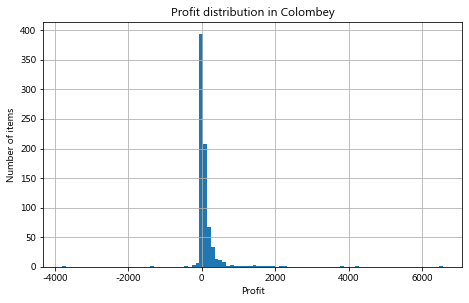

In [16]:
plt.hist(sorted2021.iloc[:,3], bins=100)
plt.rcParams["figure.figsize"] = (12.5,4.5)
plt.xlabel('Profit', fontname = font)
plt.ylabel('Number of items', fontname = font)
plt.xticks(fontname = font)
plt.title('Profit distribution in Colombey', fontname=font)
plt.rc('axes', unicode_minus=False)
plt.yticks(fontname = font)
plt.grid(visible=True)
plt.savefig('Profit Colombey.png')

In [18]:
print('Negative profits 2019: ', df2019['Profit'].lt(0).sum().sum())

print('Negative profits 2020: ', df2020['Profit'].lt(0).sum().sum())

print('Negative profits 2021: ', df2021['Profit'].lt(0).sum().sum())

Negative profits 2019:  30
Negative profits 2020:  57
Negative profits 2021:  36


In [19]:
print('Sum of negative profits 2019: ', df2019.iloc[:,3].where(df2019.iloc[:,3]<0).sum())
      
print('Sum of negative profits 2020: ', df2020.iloc[:,3].where(df2020.iloc[:,3]<0).sum())

print('Sum of negative profits 2021: ', round(df2021.iloc[:,3].where(df2021.iloc[:,3]<0).sum(),2))

Sum of negative profits 2019:  -5633.619999999999
Sum of negative profits 2020:  -5507.209999999999
Sum of negative profits 2021:  -7300.15


In [20]:
print('Total revenue 2019: ', df2019['Revenue'].sum())
print('Total profits 2019: ', df2019['Profit'].sum())
print('Margin 2019: ', round(df2019['Profit'].sum()/df2019['Revenue'].sum(),2))

print('\nTotal revenue 2020: ', df2020['Revenue'].sum())
print('Total profits 2020: ', df2020['Profit'].sum())
print('Margin 2020: ', round(df2020['Profit'].sum()/df2020['Revenue'].sum(),2))

print('\nTotal revenue 2021: ', df2021['Revenue'].sum())
print('Total profits 2021: ', round(df2021['Profit'].sum(),2))
print('Margin 2021: ', round(df2021['Profit'].sum()/df2021['Revenue'].sum(),2))

Total revenue 2019:  165167.56
Total profits 2019:  62346.38000000001
Margin 2019:  0.38

Total revenue 2020:  208471.68
Total profits 2020:  86392.99
Margin 2020:  0.41

Total revenue 2021:  238824.5
Total profits 2021:  99791.08
Margin 2021:  0.42


In [21]:
print(len(df2021))

774


In [26]:
print(sum([x for x in sorted2021.iloc[:,3] if x<-50]))

-6984.53


In [24]:
sorted2021.index[sorted2021['Profit'] < -200].tolist()

[1320, 4037, 4225, 4230]

In [25]:
sorted2021.loc[4225,:]

Statistiques médicaments 2021    VETSCAN : PREP PROFILE2 (5 + )
Revenue                                                   25.46
Quantity                                                  204.0
Profit                                                 -3788.18
Price                                                  0.124804
Unit Cost                                             18.694314
Profit margin                                       -148.789474
Name: 4225, dtype: object

In [26]:
x = sorted2021.iloc[0:133]
x[x['Profit'] < -100]

,Statistiques médicaments 2021,Revenue,Quantity,Profit,Price,Unit Cost,Profit margin
1320,EQUEST PRAMOX GEL ORAL,689.62,44.0,-434.72,15.673182,25.553182,-0.630376
